In [34]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
fotos_rgb = dict()
fotos_gray = dict()

for i in range(1, 11):
    img = cv2.imread(f'fotos/img{i}.png')
    img = cv2.resize(value, (720, 720))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fotos_rgb["img" + str(i)] = img_rgb
    fotos_gray["img" + str(i)] = img_gray
    
fotos_rgb.keys(), fotos_gray.keys()

(dict_keys(['img1', 'img2', 'img3', 'img4', 'img5', 'img6', 'img7', 'img8', 'img9', 'img10']),
 dict_keys(['img1', 'img2', 'img3', 'img4', 'img5', 'img6', 'img7', 'img8', 'img9', 'img10']))

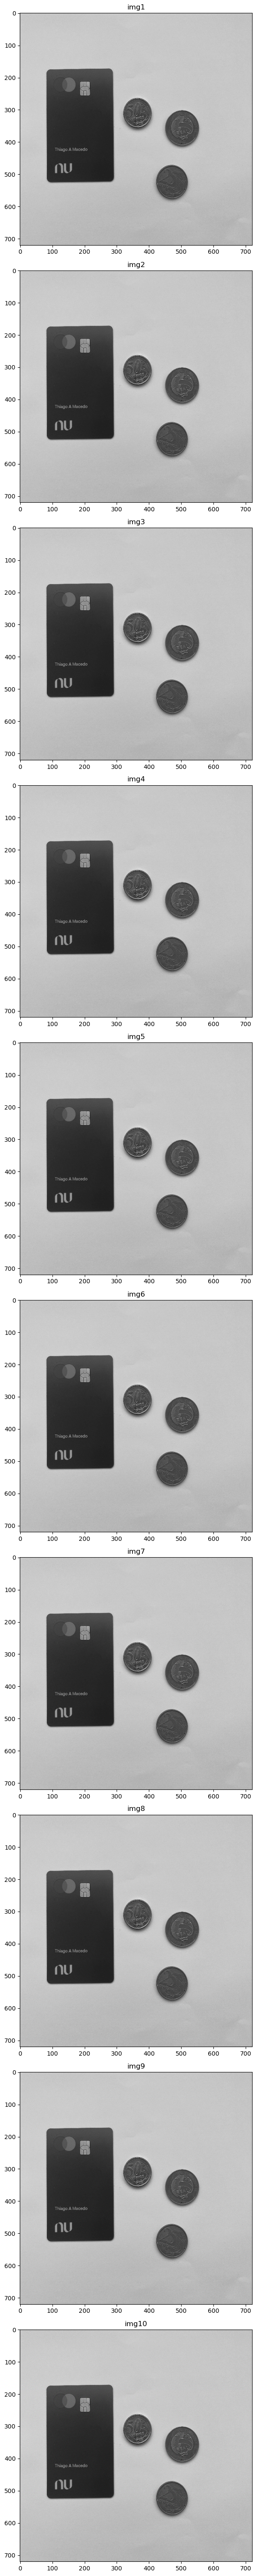

In [49]:
fig, axs = plt.subplots(nrows=len(fotos_gray), ncols=1, figsize=(6, 6*len(fotos_gray)))

for i, (key, value) in enumerate(fotos_gray.items()):
    axs[i].imshow(value, cmap="gray")
    axs[i].set_title(key)

plt.tight_layout()
plt.show()